In [1]:
# Kutibxonalardi tortib olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [2]:
# dataset ornatib olamiz
df = pd.read_csv("adultincomedatase.csv")

In [3]:
# data bilan tanishib chiqamiz
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# data bilan tanishib chiqamiz
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# data bilan tanishib chiqamiz
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])  

In [11]:
X = df.drop(columns=['income'])  
y = df['income']  

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression objective
    'max_depth': 6,                  # Maximum depth of trees
    'eta': 0.1,                      # Learning rate
    'subsample': 0.8,                # Subsample ratio of training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns
    'eval_metric': 'rmse'            # Evaluation metric
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)


[0]	test-rmse:0.40725
[1]	test-rmse:0.39249
[2]	test-rmse:0.37894
[3]	test-rmse:0.36772
[4]	test-rmse:0.35802
[5]	test-rmse:0.34986
[6]	test-rmse:0.34289
[7]	test-rmse:0.33683
[8]	test-rmse:0.33198
[9]	test-rmse:0.32767
[10]	test-rmse:0.32440
[11]	test-rmse:0.32127
[12]	test-rmse:0.31871
[13]	test-rmse:0.31671
[14]	test-rmse:0.31452
[15]	test-rmse:0.31280
[16]	test-rmse:0.31149
[17]	test-rmse:0.30997
[18]	test-rmse:0.30873
[19]	test-rmse:0.30788
[20]	test-rmse:0.30693
[21]	test-rmse:0.30589
[22]	test-rmse:0.30501
[23]	test-rmse:0.30413
[24]	test-rmse:0.30347
[25]	test-rmse:0.30286
[26]	test-rmse:0.30212
[27]	test-rmse:0.30147
[28]	test-rmse:0.30100
[29]	test-rmse:0.30036
[30]	test-rmse:0.29997
[31]	test-rmse:0.29958
[32]	test-rmse:0.29926
[33]	test-rmse:0.29895
[34]	test-rmse:0.29870
[35]	test-rmse:0.29840
[36]	test-rmse:0.29820
[37]	test-rmse:0.29793
[38]	test-rmse:0.29749
[39]	test-rmse:0.29734
[40]	test-rmse:0.29710
[41]	test-rmse:0.29702
[42]	test-rmse:0.29692
[43]	test-rmse:0.2968

In [16]:
#  predictions on the test set
y_pred = model.predict(dtest)


In [17]:
y[0]

np.int64(0)

In [18]:
y_pred[0]

np.float32(-0.007106123)

In [19]:
# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

RMSE: 0.29318845121020887
MAE: 0.18435029869692
R2 Score: 0.5210226774215698


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


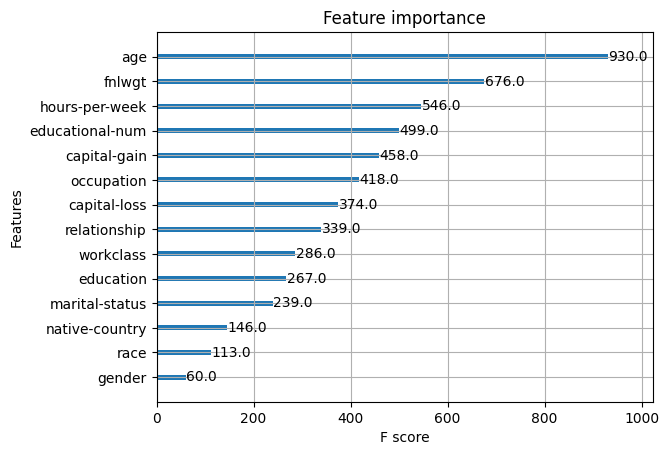

In [20]:
# Plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [1]:
# Kutibxonalardi tortib olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset ornatib olamiz
df = pd.read_csv("adultincomedatase.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:

label_encoder = LabelEncoder()

# Columns to be label-encoded
columns_to_encode = ["income"]

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


for col in categorical_columns:
    df[col] = df[col].astype('category')


In [7]:
type(categorical_columns)

list

In [8]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [9]:
# Define the data and the labels
X = df.drop('income', axis=1)
y = df['income']


In [10]:
X.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  category
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  category
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  category
 6   occupation       48842 non-null  category
 7   relationship     48842 non-null  category
 8   race             48842 non-null  category
 9   gender           48842 non-null  category
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  int64   
 13  native-country   48842 non-null  category
dtypes: category(8), int64(6)
memory usage: 2.6 MB


In [14]:
# Create the dataset for LightGBM
train_data = lgb.Dataset(X, label=y, categorical_feature=categorical_columns)


In [15]:
train_data

In [16]:
# Train the model with appropriate parameters
params = {
    'objective': 'regression',  # Using regression because the target 'Discount on Fees' is continuous
    'metric': 'rmse'  # RMSE for regression
}

In [17]:
model = lgb.train(params, train_data)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 48842, number of used features: 14
[LightGBM] [Info] Start training from score 0.239282


In [18]:
y_pred = model.predict(X)  

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared (R²)
r2 = r2_score(y, y_pred)
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.08140819456206976
R-squared (R²): 0.5527661238867201
